minmax 처리

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

# 파일 경로 리스트 정의
file_paths = [
    './normalized_data/DIA_residual_normalized.csv',
    './normalized_data/Gold_residual_normalized.csv',
    './normalized_data/Oil_residual_normalized.csv',
    './normalized_data/QQQ_residual_normalized.csv',
    './normalized_data/SPY_residual_normalized.csv',
    './normalized_data/US10-Year_Bond_residual_normalized.csv',
    './normalized_data/USD_KRW_residual_normalized.csv',
    './normalized_data/VIX_residual_normalized.csv'
]

file_paths2 = ['./Kalman_filtered_data/k_filtered_DIA.csv','./Kalman_filtered_data/k_filtered_Gold.csv',
          './Kalman_filtered_data/k_filtered_Oil.csv','./Kalman_filtered_data/k_filtered_QQQ.csv',
          './Kalman_filtered_data/k_filtered_SPY.csv','./Kalman_filtered_data/k_filtered_US10-Year_Bond.csv',
          './Kalman_filtered_data/k_filtered_USD_KRW.csv','./Kalman_filtered_data/k_filtered_VIX.csv']

indices=['DIA','Gold','Oil','QQQ','SPY','US10-Year_Bond','USD_KRW','VIX']
# 각 파일을 처리하는 루프
for i in range(8):
    # 데이터 파일 읽기
    file_path = file_paths[i]
    df = pd.read_csv(file_path)
    
    # 데이터 이름 추출 (파일명에서 '/' 이후, '_residual_normalized.csv' 이전 부분)
    data_name = indices[i]
    
    # MinMaxScaler 인스턴스 생성
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # 'diff_log_resid' 열이 있는지 확인하고 해당 열에 MinMaxScaler 적용
    if 'diff_log_resid' in df.columns:
        # 결측치 제거
        df_clean = df.dropna(subset=['diff_log_resid'])
        
        # 스케일링 적용 (2D 배열로 변환 후 스케일링)
        scaled_values = scaler.fit_transform(df_clean[['diff_log_resid']])
        
        # 스케일링된 값을 새 열로 추가
        df_clean['minmax_scaled'] = scaled_values
        
        # 결과 저장
        output_path = f'./normalized_data/{data_name}_minmaxnormalized_data.csv'
        df_clean.to_csv(output_path, index=False)
        
        print(f"MinMaxScaler 적용 완료: {output_path}")
    else:
        print(f"경고: {file_path} 파일에 'diff_log_resid' 열이 존재하지 않습니다.")


# 각 파일을 처리하는 루프
for i in range(8):
    # 데이터 파일 읽기
    file_path = file_paths2[i]
    df = pd.read_csv(file_path)
    
    # 데이터 이름 추출 (파일명에서 '/' 이후, '_residual_normalized.csv' 이전 부분)
    data_name = indices[i]
    
    # MinMaxScaler 인스턴스 생성
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # 'diff_log_resid' 열이 있는지 확인하고 해당 열에 MinMaxScaler 적용
    if 'Price' in df.columns:
        # 결측치 제거
        df_clean = df.dropna(subset=['Price'])
        
        
        # 스케일링 적용 (2D 배열로 변환 후 스케일링)
        scaled_values = scaler.fit_transform(df_clean[['Price']])
        
        # 스케일링된 값을 새 열로 추가
        df_clean['minmax_scaled'] = scaled_values
        # 결과 저장
        output_path = f'./minmax_scaled_price/{data_name}_minmaxnormalized_data.csv'
        df_clean[['Date','Price']].to_csv(output_path, index=False)
        
        print(f"MinMaxScaler 적용 완료: {output_path}")
    else:
        print(f"경고: {file_path} 파일에 'Price' 열이 존재하지 않습니다.")





MinMaxScaler 적용 완료: ./normalized_data/DIA_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./normalized_data/Gold_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./normalized_data/Oil_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./normalized_data/QQQ_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./normalized_data/SPY_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./normalized_data/US10-Year_Bond_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./normalized_data/USD_KRW_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./normalized_data/VIX_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./minmax_scaled_price/DIA_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./minmax_scaled_price/Gold_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./minmax_scaled_price/Oil_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./minmax_scaled_price/QQQ_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./minmax_scaled_price/SPY_minmaxnormalized_data.csv
MinMaxScaler 적용 완료: ./minmax_scaled_price/US10-Year_Bond_minmaxnormalized_data.

시각화

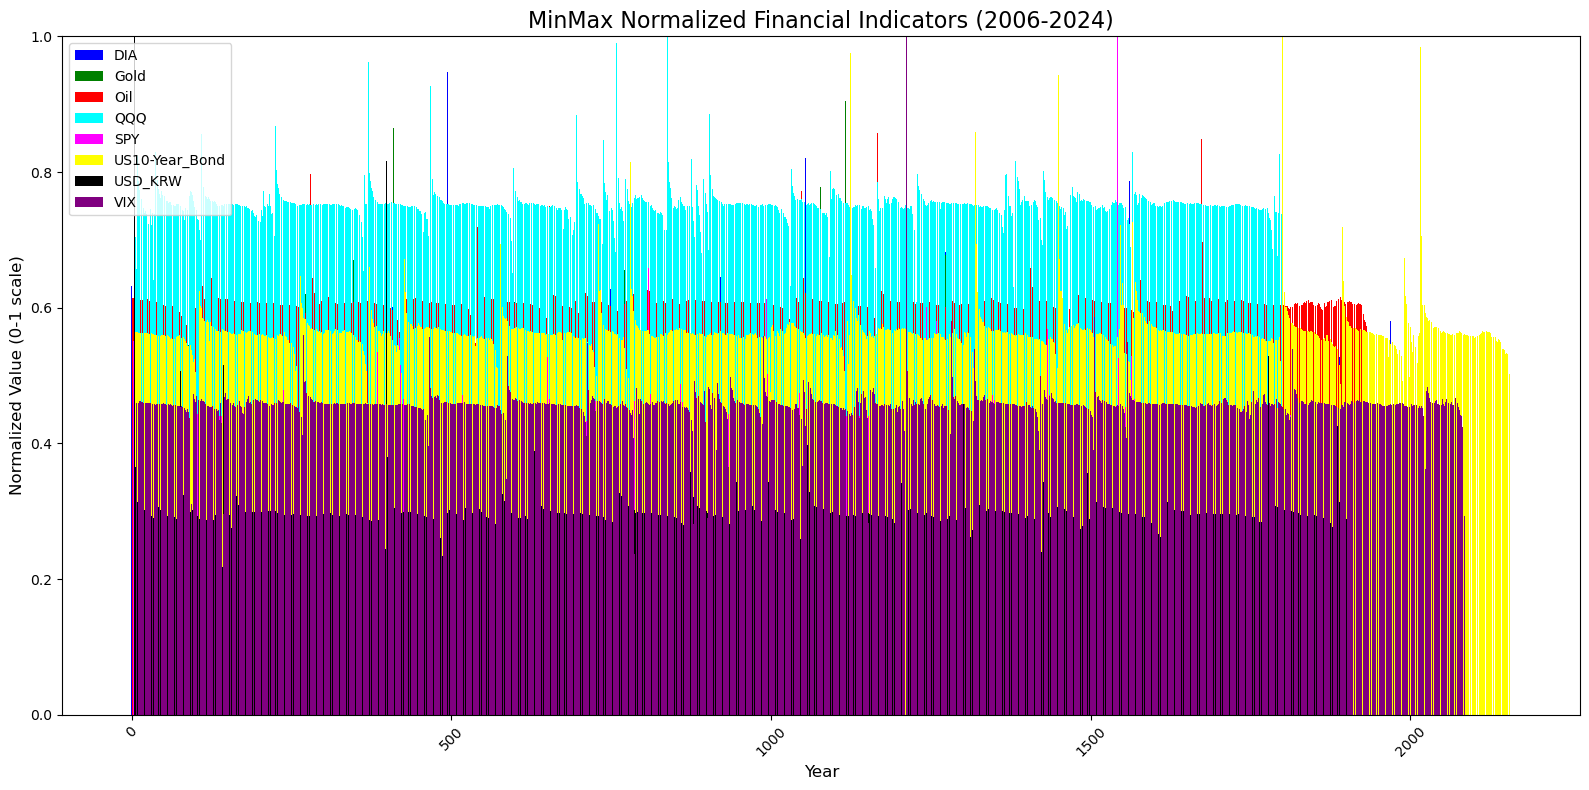

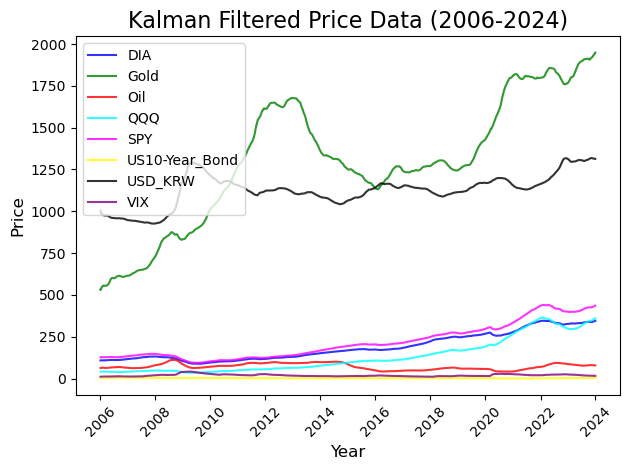

In [46]:
###시각화



# 파일 경로 리스트 정의
file_paths = [
    './normalized_data/DIA_minmaxnormalized_data.csv',
    './normalized_data/Gold_minmaxnormalized_data.csv',
    './normalized_data/Oil_minmaxnormalized_data.csv',
    './normalized_data/QQQ_minmaxnormalized_data.csv',
    './normalized_data/SPY_minmaxnormalized_data.csv',
    './normalized_data/US10-Year_Bond_minmaxnormalized_data.csv',
    './normalized_data/USD_KRW_minmaxnormalized_data.csv',
    './normalized_data/VIX_minmaxnormalized_data.csv'
]

file_paths2 = [
    './minmax_scaled_price/DIA_minmaxnormalized_data.csv',
    './minmax_scaled_price/Gold_minmaxnormalized_data.csv',
    './minmax_scaled_price/Oil_minmaxnormalized_data.csv',
    './minmax_scaled_price/QQQ_minmaxnormalized_data.csv',
    './minmax_scaled_price/SPY_minmaxnormalized_data.csv',
    './minmax_scaled_price/US10-Year_Bond_minmaxnormalized_data.csv',
    './minmax_scaled_price/USD_KRW_minmaxnormalized_data.csv',
    './minmax_scaled_price/VIX_minmaxnormalized_data.csv'
]

# 데이터 이름 리스트 생성 (범례용)
data_names = ['DIA', 'Gold', 'Oil', 'QQQ', 'SPY', 'US10-Year_Bond', 'USD_KRW', 'VIX']

# 색상 리스트 설정 (각 데이터에 대해 다른 색상 사용)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple']

# 그래프 크기 설정
plt.figure(figsize=(16, 8))

# 막대 너비 설정
bar_width = 0.8

# 각 파일에 대해 데이터 로드 및 시각화
for i, file_path in enumerate(file_paths):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        
        if 'minmax_scaled' in df.columns:
            x_indexes = np.arange(len(df))  # 각 데이터셋의 길이에 맞게 x_indexes 생성
            
            # 막대 그래프 생성 (각 데이터셋을 옆으로 배치)
            plt.bar(x_indexes + i * bar_width, df['minmax_scaled'],
                    color=colors[i % len(colors)], width=bar_width,
                    label=data_names[i], alpha=1.0)
        else:
            print(f"경고: {file_path} 파일에 'minmax_scaled' 열이 존재하지 않습니다.")
    else:
        print(f"경고: {file_path} 파일이 존재하지 않습니다.")

# 그래프 제목 및 레이블 설정
plt.title('MinMax Normalized Financial Indicators (2006-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Value (0-1 scale)', fontsize=12)

# x축 눈금 설정 (연도별)
plt.xticks(rotation=45)

# y축 범위 설정
plt.ylim(0, 1.0)

# 범례 추가
plt.legend(loc='upper left', fontsize=10)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 각 파일에 대해 데이터 로드 및 시각화
for i, file_path in enumerate(file_paths2):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        
        if 'Price' in df.columns:
            plt.plot(df.index, df['Price'],
            color=colors[i % len(colors)],
            label=data_names[i], linewidth=1.5, alpha=0.8)
        else:
            print(f"경고: {file_path} 파일에 'Price' 열이 존재하지 않습니다.")
    else:
        print(f"경고: {file_path} 파일이 존재하지 않습니다.")

# 그래프 제목 및 레이블 설정
plt.title('Kalman Filtered Price Data (2006-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)

# x축 눈금 설정 (연도별)
plt.xticks(rotation=45)

# 범례 추가
plt.legend(loc='upper left', fontsize=10)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

